<a href="https://colab.research.google.com/github/carloslme/tv_program_info/blob/main/personicore_use_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import glob
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [34]:
!unzip '/content/file_2.zip' -d '/content/model_2/'

Archive:  /content/file_2.zip
   creating: /content/model_2/content/saved_model_2/
   creating: /content/model_2/content/saved_model_2/my_model/
  inflating: /content/model_2/content/saved_model_2/my_model/saved_model.pb  
   creating: /content/model_2/content/saved_model_2/my_model/variables/
  inflating: /content/model_2/content/saved_model_2/my_model/variables/variables.index  
  inflating: /content/model_2/content/saved_model_2/my_model/variables/variables.data-00000-of-00001  
   creating: /content/model_2/content/saved_model_2/my_model/assets/


In [35]:
# Loading model
new_model = tf.keras.models.load_model('/content/model_2/content/saved_model_2/my_model')

# Check its architecture
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_4 (Sequential)    (None, 256, 256, 3)       0         
_________________________________________________________________
rescaling_5 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)       

In [36]:
batch_size = 32
img_height = 256
img_width = 256

In [37]:
test_img = '/content/img_2019_09_16_11_08_35.jpg'
img = keras.preprocessing.image.load_img(
    test_img, target_size=(img_height, img_width)
)
class_names = ['grid', 'show']

In [38]:
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to '{}' with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

This image most likely belongs to 'show' with a 100.00 percent confidence.


In [16]:
pip install easyocr

     |████████████████████████████████| 48.9MB 82kB/s 


In [39]:
import easyocr
import cv2
from google.colab.patches import cv2_imshow

In [18]:
reader = easyocr.Reader(['es','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [19]:
result = reader.readtext('/content/img_2019_09_16_10_19_06.jpg')

In [20]:
print(result)

[([[993, 234], [1070, 234], [1070, 270], [993, 270]], 'EilT', 0.017524974420666695), ([[65, 785], [127, 785], [127, 821], [65, 821]], '525', 0.7556153535842896), ([[293, 785], [449, 785], [449, 823], [293, 823]], '10:19 AM', 0.4724937975406647), ([[943, 785], [1101, 785], [1101, 823], [943, 823]], '10:00 AM', 0.49835407733917236), ([[1129, 785], [1287, 785], [1287, 823], [1129, 823]], '10:30 AM', 0.2773309051990509), ([[1660, 788], [1839, 788], [1839, 836], [1660, 836]], 'for options', 0.47504758834838867), ([[1529, 793], [1611, 793], [1611, 829], [1529, 829]], 'Press', 0.9667810797691345), ([[67, 827], [359, 827], [359, 869], [67, 869]], 'NYC TV HD boara', 0.19737304747104645), ([[420, 842], [768, 842], [768, 868], [420, 868]], ';', 0.0004227596800774336), ([[241, 859], [625, 859], [625, 923], [241, 923]], 'us Make48 (2018) pe', 0.09147454053163528), ([[348, 912], [388, 912], [388, 944], [348, 944]], 'E6', 0.8577223420143127), ([[1489, 913], [1529, 913], [1529, 931], [1489, 931]], 'HD

In [31]:
# load the input image from disk
image = cv2.imread('/content/img_2019_09_16_11_08_35.jpg')
# OCR the input image using EasyOCR
print("[INFO] OCR'ing input image...")
langs = ['es','en']
reader = easyocr.Reader(langs, gpu=-1)
results = reader.readtext(image)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[INFO] OCR'ing input image...


[INFO] 0.7281: Tehran, Iran
[INFO] 0.2149: Biyadh, Saudi Arabia
[INFO] 0.2995: 7:38 PM
[INFO] 0.4378: 6:08 PM
[INFO] 0.0435: NEW DEVELOPMENTS
[INFO] 0.1397: LIV E
[INFO] 0.0002: TRUMP: U.S. "LOCKED ANDLOADED" AFTER SAUDI OIL FIELD AITACK
[INFO] 0.1781: CNN
[INFO] 0.0996: Saudi-led coalition: Iranian weapons used, attack not launched from Yemen
[INFO] 0.0323: Dom
[INFO] 0.0371: 20.21
[INFO] 0.0012: DDUCTION BACK ON ITS FEET AFTER THE ATTACKS "WILL TAKE WEEKS, NOT
[INFO] 0.1193: AT THIS HOUR


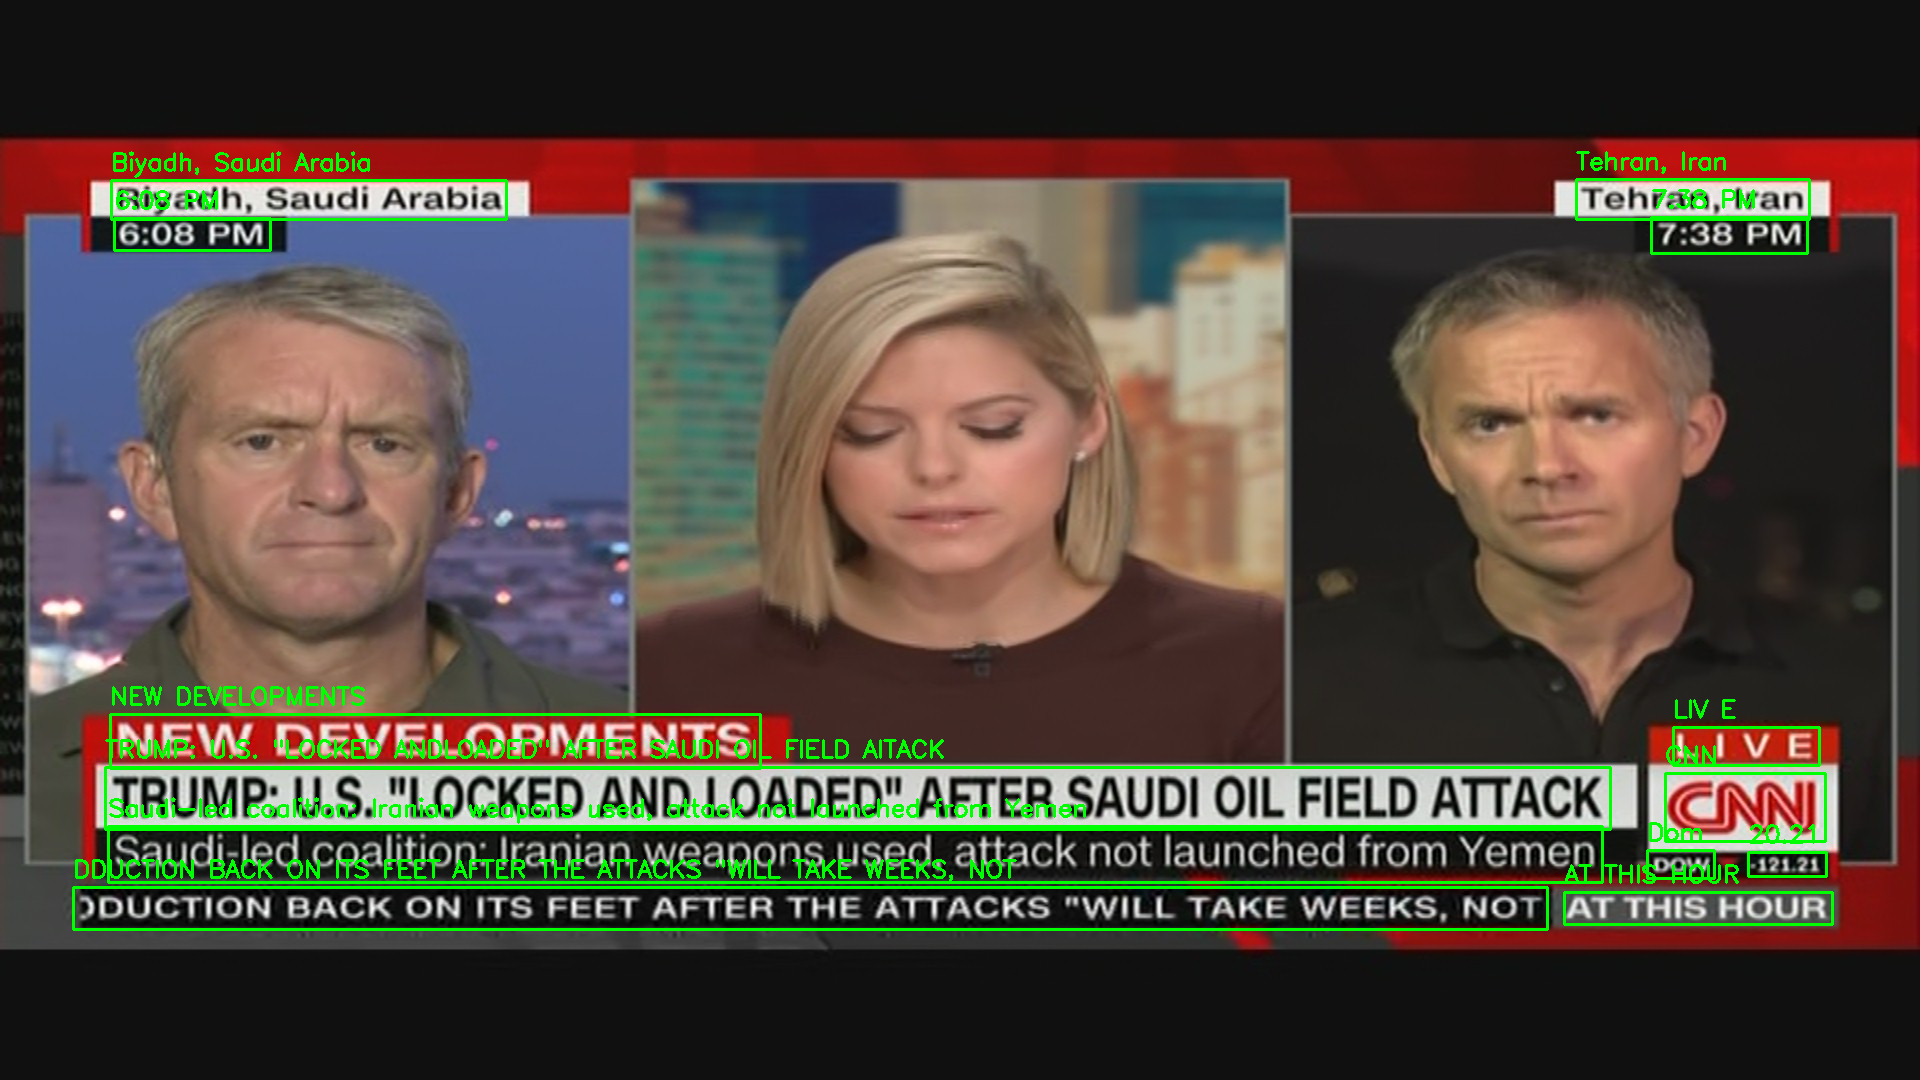

-1

In [32]:
def cleanup_text(text):
	# strip out non-ASCII text so we can draw the text on the image
	# using OpenCV
	return "".join([c if ord(c) < 128 else "" for c in text]).strip()
 
# loop over the results
for (bbox, text, prob) in results:
	# display the OCR'd text and associated probability
	print("[INFO] {:.4f}: {}".format(prob, text))
	# unpack the bounding box
	(tl, tr, br, bl) = bbox
	tl = (int(tl[0]), int(tl[1]))
	tr = (int(tr[0]), int(tr[1]))
	br = (int(br[0]), int(br[1]))
	bl = (int(bl[0]), int(bl[1]))
	# cleanup the text and draw the box surrounding the text along
	# with the OCR'd text itself
	text = cleanup_text(text)
	cv2.rectangle(image, tl, br, (0, 255, 0), 2)
	cv2.putText(image, text, (tl[0], tl[1] - 10),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

# show the output image
cv2_imshow(image)
cv2.waitKey(0)